In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import LSTM, Dense

# Get stock data from tiingo

import requests
nan=np.nan

In [2]:
def get_stock_data(stock_symbol, start_date, end_date):
    base_url = f'https://api.tiingo.com/tiingo/daily/{stock_symbol}/prices?'
    token = '59e2dfca5859e44a55ef766a8f81aab1ab8a80e8'
    payload = {
        'startDate': start_date,
        'endDate': end_date,
        'token': token
    }
    response = requests.get(base_url, params=payload)
    return response

In [3]:
DBGmode = 1
ticker = 'NVDA'
st_date = '2019-8-8'
#st_date = '2020-8-20'
en_date = '2020-9-8'

response = get_stock_data(ticker, st_date, en_date)

if DBGmode == 1:
    print(response.url)
    print(response.json())

https://api.tiingo.com/tiingo/daily/NVDA/prices?startDate=2019-8-8&endDate=2020-9-8&token=59e2dfca5859e44a55ef766a8f81aab1ab8a80e8
[{'date': '2019-08-08T00:00:00.000Z', 'close': 158.26, 'high': 158.31, 'low': 153.9, 'open': 156.21, 'volume': 7732500, 'adjClose': 157.7695899535, 'adjHigh': 157.8194350154, 'adjLow': 153.423100555, 'adjOpen': 155.7259424152, 'adjVolume': 7732500, 'divCash': 0.0, 'splitFactor': 1.0}, {'date': '2019-08-09T00:00:00.000Z', 'close': 154.18, 'high': 156.75, 'low': 152.15, 'open': 156.61, 'volume': 8545400, 'adjClose': 153.7022329017, 'adjHigh': 156.2642690838, 'adjLow': 151.6785233882, 'adjOpen': 156.1247029105, 'adjVolume': 8545400, 'divCash': 0.0, 'splitFactor': 1.0}, {'date': '2019-08-12T00:00:00.000Z', 'close': 151.45, 'high': 154.18, 'low': 150.57, 'open': 152.08, 'volume': 6980000, 'adjClose': 150.9806925215, 'adjHigh': 153.7022329017, 'adjLow': 150.1034194319, 'adjOpen': 151.6087403016, 'adjVolume': 6980000, 'divCash': 0.0, 'splitFactor': 1.0}, {'date': 

In [4]:
def parse_data(data_response):
    json_data = data_response.json()
    dates = []
    closes =[]
    opens = []
    highs = []
    lows = []
    vols = []
    for json_object in json_data:
        dates.append(json_object['date'])
        closes.append(json_object['close'])
        opens.append(json_object['open'])
        highs.append(json_object['high'])
        lows.append(json_object['low'])
        vols.append(json_object['volume'])
    return dates, closes, opens, highs, lows, vols

In [5]:
dates, closes, opens, highs, lows, vols = parse_data(response)

if DBGmode == 1:
    print(dates, closes)

['2019-08-08T00:00:00.000Z', '2019-08-09T00:00:00.000Z', '2019-08-12T00:00:00.000Z', '2019-08-13T00:00:00.000Z', '2019-08-14T00:00:00.000Z', '2019-08-15T00:00:00.000Z', '2019-08-16T00:00:00.000Z', '2019-08-19T00:00:00.000Z', '2019-08-20T00:00:00.000Z', '2019-08-21T00:00:00.000Z', '2019-08-22T00:00:00.000Z', '2019-08-23T00:00:00.000Z', '2019-08-26T00:00:00.000Z', '2019-08-27T00:00:00.000Z', '2019-08-28T00:00:00.000Z', '2019-08-29T00:00:00.000Z', '2019-08-30T00:00:00.000Z', '2019-09-03T00:00:00.000Z', '2019-09-04T00:00:00.000Z', '2019-09-05T00:00:00.000Z', '2019-09-06T00:00:00.000Z', '2019-09-09T00:00:00.000Z', '2019-09-10T00:00:00.000Z', '2019-09-11T00:00:00.000Z', '2019-09-12T00:00:00.000Z', '2019-09-13T00:00:00.000Z', '2019-09-16T00:00:00.000Z', '2019-09-17T00:00:00.000Z', '2019-09-18T00:00:00.000Z', '2019-09-19T00:00:00.000Z', '2019-09-20T00:00:00.000Z', '2019-09-23T00:00:00.000Z', '2019-09-24T00:00:00.000Z', '2019-09-25T00:00:00.000Z', '2019-09-26T00:00:00.000Z', '2019-09-27T00:00:0

In [6]:
data = pd.DataFrame(columns = ['Close'], index = dates)
dfindex = data.index
dfindex.name = 'Date'

In [7]:
data['Close']=closes

if DBGmode == 1:
    data

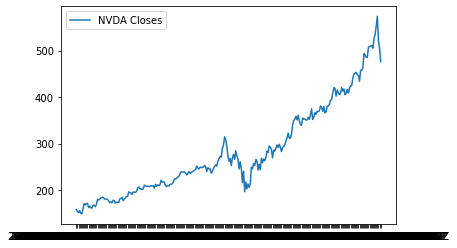

In [8]:
plt.plot(data['Close'], label=ticker+' Closes')
plt.legend()
plt.show()

In [9]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

if DBGmode == 1:
    #scaled_data = data['Close']
    print(scaled_data)

[[0.02232468]
 [0.01272672]
 [0.00630455]
 [0.01712579]
 [0.00305818]
 [0.        ]
 [0.02538286]
 [0.05177727]
 [0.04493166]
 [0.05283587]
 [0.05342398]
 [0.0321579 ]
 [0.03923875]
 [0.03065233]
 [0.02928792]
 [0.04288504]
 [0.04408478]
 [0.03622762]
 [0.04702534]
 [0.07285516]
 [0.070291  ]
 [0.07464302]
 [0.08094756]
 [0.08365287]
 [0.08351173]
 [0.07803053]
 [0.07396081]
 [0.07598391]
 [0.07341975]
 [0.06626832]
 [0.05627044]
 [0.06132819]
 [0.05589405]
 [0.06930297]
 [0.0672093 ]
 [0.05408266]
 [0.05951681]
 [0.05935214]
 [0.05709379]
 [0.0765485 ]
 [0.07810111]
 [0.08365287]
 [0.06695053]
 [0.07513703]
 [0.0805947 ]
 [0.08755793]
 [0.08882825]
 [0.11197629]
 [0.10689501]
 [0.10708321]
 [0.09814392]
 [0.11112941]
 [0.11018843]
 [0.10896516]
 [0.11312898]
 [0.13119575]
 [0.13648874]
 [0.12738479]
 [0.12757298]
 [0.12291515]
 [0.12660848]
 [0.14521631]
 [0.14312263]
 [0.1384648 ]
 [0.14013503]
 [0.13881766]
 [0.13975864]
 [0.14312263]
 [0.14067609]
 [0.14354607]
 [0.13037239]
 [0.14

In [10]:
train_length = int(len(scaled_data) * 0.7)
test_length = len(scaled_data) - train_length
train_data = scaled_data[0:train_length,:]
test_data = scaled_data[train_length:len(scaled_data),:]

if DBGmode == 1:
    #train_length = int(len(scaled_data) * 0.7)
    #test_length = len(scaled_data) - train_length
    #train_data = scaled_data[0:train_length]
    #test_data = scaled_data[train_length:len(scaled_data)]
    print(len(scaled_data))
    print(train_length)
    print(test_length)

train_data

274
191
83


array([[0.02232468],
       [0.01272672],
       [0.00630455],
       [0.01712579],
       [0.00305818],
       [0.        ],
       [0.02538286],
       [0.05177727],
       [0.04493166],
       [0.05283587],
       [0.05342398],
       [0.0321579 ],
       [0.03923875],
       [0.03065233],
       [0.02928792],
       [0.04288504],
       [0.04408478],
       [0.03622762],
       [0.04702534],
       [0.07285516],
       [0.070291  ],
       [0.07464302],
       [0.08094756],
       [0.08365287],
       [0.08351173],
       [0.07803053],
       [0.07396081],
       [0.07598391],
       [0.07341975],
       [0.06626832],
       [0.05627044],
       [0.06132819],
       [0.05589405],
       [0.06930297],
       [0.0672093 ],
       [0.05408266],
       [0.05951681],
       [0.05935214],
       [0.05709379],
       [0.0765485 ],
       [0.07810111],
       [0.08365287],
       [0.06695053],
       [0.07513703],
       [0.0805947 ],
       [0.08755793],
       [0.08882825],
       [0.111

In [11]:
def create_dataset(dataset, timestep=1):
    data_x, data_y = [], []
    #for i in range(len(dataset) - timestep - 1):
        #data_x.append(dataset[i:(i+timestep),0])
        #data_y.append(dataset[i+timestep,0])
    for i in range(len(dataset) - timestep):
        data_x.append(dataset[i:(i+timestep),0])
        data_y.append(dataset[i+timestep,0])
    return np.array(data_x), np.array(data_y)

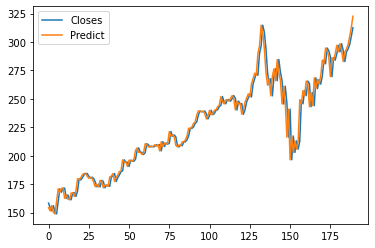

[[0.02232468]
 [0.01272672]
 [0.00630455]
 [0.01712579]
 [0.00305818]
 [0.        ]
 [0.02538286]
 [0.05177727]
 [0.04493166]
 [0.05283587]
 [0.05342398]
 [0.0321579 ]
 [0.03923875]
 [0.03065233]
 [0.02928792]
 [0.04288504]
 [0.04408478]
 [0.03622762]
 [0.04702534]
 [0.07285516]
 [0.070291  ]
 [0.07464302]
 [0.08094756]
 [0.08365287]
 [0.08351173]
 [0.07803053]
 [0.07396081]
 [0.07598391]
 [0.07341975]
 [0.06626832]
 [0.05627044]
 [0.06132819]
 [0.05589405]
 [0.06930297]
 [0.0672093 ]
 [0.05408266]
 [0.05951681]
 [0.05935214]
 [0.05709379]
 [0.0765485 ]
 [0.07810111]
 [0.08365287]
 [0.06695053]
 [0.07513703]
 [0.0805947 ]
 [0.08755793]
 [0.08882825]
 [0.11197629]
 [0.10689501]
 [0.10708321]
 [0.09814392]
 [0.11112941]
 [0.11018843]
 [0.10896516]
 [0.11312898]
 [0.13119575]
 [0.13648874]
 [0.12738479]
 [0.12757298]
 [0.12291515]
 [0.12660848]
 [0.14521631]
 [0.14312263]
 [0.1384648 ]
 [0.14013503]
 [0.13881766]
 [0.13975864]
 [0.14312263]
 [0.14067609]
 [0.14354607]
 [0.13037239]
 [0.14

In [12]:
timestep = 1
train_x, train_y = create_dataset(train_data, timestep)
test_x, test_y = create_dataset(test_data, timestep)

if DBGmode == 1:
    #print(train_x.head(5))
    #print(train_y.head(5))
    train_ya = train_y.reshape(-1,1)
    plt.plot(scaler.inverse_transform(train_x), label='Closes')
    plt.plot(scaler.inverse_transform(train_ya), label='Predict')
    plt.legend()
    plt.show()

print(train_x)

In [13]:
if DBGmode == 1:
    print(train_x.shape)
    print(test_x.shape)

(190, 1)
(82, 1)


In [14]:
train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))

if DBGmode == 1:
    print(train_x)

[[[0.02232468]]

 [[0.01272672]]

 [[0.00630455]]

 [[0.01712579]]

 [[0.00305818]]

 [[0.        ]]

 [[0.02538286]]

 [[0.05177727]]

 [[0.04493166]]

 [[0.05283587]]

 [[0.05342398]]

 [[0.0321579 ]]

 [[0.03923875]]

 [[0.03065233]]

 [[0.02928792]]

 [[0.04288504]]

 [[0.04408478]]

 [[0.03622762]]

 [[0.04702534]]

 [[0.07285516]]

 [[0.070291  ]]

 [[0.07464302]]

 [[0.08094756]]

 [[0.08365287]]

 [[0.08351173]]

 [[0.07803053]]

 [[0.07396081]]

 [[0.07598391]]

 [[0.07341975]]

 [[0.06626832]]

 [[0.05627044]]

 [[0.06132819]]

 [[0.05589405]]

 [[0.06930297]]

 [[0.0672093 ]]

 [[0.05408266]]

 [[0.05951681]]

 [[0.05935214]]

 [[0.05709379]]

 [[0.0765485 ]]

 [[0.07810111]]

 [[0.08365287]]

 [[0.06695053]]

 [[0.07513703]]

 [[0.0805947 ]]

 [[0.08755793]]

 [[0.08882825]]

 [[0.11197629]]

 [[0.10689501]]

 [[0.10708321]]

 [[0.09814392]]

 [[0.11112941]]

 [[0.11018843]]

 [[0.10896516]]

 [[0.11312898]]

 [[0.13119575]]

 [[0.13648874]]

 [[0.12738479]]

 [[0.12757298]

In [15]:
#model = Sequential()
#model.add(LSTM(256, input_shape=(1,1)))
#model.add(Dense(1, activation='sigmoid'))
#model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
#print(model.summary())

model = Sequential()
model.add(LSTM(256, input_shape=(1,1)))
model.add(Dense(1, activation='sigmoid'))
#model.add(Dense(6, input_dim=6, activation='relu'))
#model.add(Dense(6, activation='relu'))
#model.add(Dense(1, activation=None))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 256)               264192    
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
model.fit(train_x, train_y, epochs=5, batch_size=1, verbose=1)
score = model.evaluate(train_x, train_y, verbose=0)
print('Keras model loss = ', score[0])
print('Keras model accuracy = ', score[1])

Epoch 1/5
190/190 [==============================] - 0s 1ms/step - loss: 0.0313 - accuracy: 0.0053
Epoch 2/5
190/190 [==============================] - 0s 1ms/step - loss: 0.0106 - accuracy: 0.0053
Epoch 3/5
190/190 [==============================] - 0s 1ms/step - loss: 0.0077 - accuracy: 0.0053
Epoch 4/5
190/190 [==============================] - 0s 1ms/step - loss: 0.0052 - accuracy: 0.0053
Epoch 5/5
190/190 [==============================] - 0s 1ms/step - loss: 0.0031 - accuracy: 0.0053
Keras model loss =  0.00217221537604928
Keras model accuracy =  0.005263158120214939


In [17]:
train_predictions = model.predict(train_x)
test_predictions = model.predict(test_x)

if DBGmode == 1:
    print(train_predictions)

[[0.11267868]
 [0.10898587]
 [0.10656998]
 [0.1106661 ]
 [0.10536557]
 [0.10424092]
 [0.11387607]
 [0.12463939]
 [0.1217736 ]
 [0.12508723]
 [0.12533659]
 [0.11656556]
 [0.11943024]
 [0.11596355]
 [0.11542019]
 [0.12092692]
 [0.12142265]
 [0.11820525]
 [0.12264454]
 [0.13379547]
 [0.13265458]
 [0.1345956 ]
 [0.1374459 ]
 [0.13868299]
 [0.13861811]
 [0.13612124]
 [0.1342898 ]
 [0.13519791]
 [0.1340478 ]
 [0.13087994]
 [0.12654895]
 [0.12872565]
 [0.12638816]
 [0.13221705]
 [0.13129345]
 [0.12561628]
 [0.12794277]
 [0.12787178]
 [0.12690136]
 [0.13545206]
 [0.13615328]
 [0.13868299]
 [0.13117963]
 [0.13481724]
 [0.13728502]
 [0.14048356]
 [0.1410732 ]
 [0.152147  ]
 [0.1496624 ]
 [0.14975387]
 [0.14545432]
 [0.15173084]
 [0.15126932]
 [0.15067095]
 [0.15271491]
 [0.16182074]
 [0.16456172]
 [0.15986773]
 [0.15996385]
 [0.15759927]
 [0.15947211]
 [0.16915393]
 [0.168044  ]
 [0.16559348]
 [0.16646925]
 [0.16577825]
 [0.16627166]
 [0.168044  ]
 [0.16675371]
 [0.16826808]
 [0.16139731]
 [0.17

In [18]:
train_predictions = scaler.inverse_transform(train_predictions)
train_y = scaler.inverse_transform([train_y])

test_predictions = scaler.inverse_transform(test_predictions)
test_y = scaler.inverse_transform([test_y])

if DBGmode == 1:
    print(train_predictions)
    print(test_predictions)

[[196.66858]
 [195.0988 ]
 [194.07182]
 [195.81305]
 [193.55984]
 [193.08177]
 [197.17758]
 [201.75296]
 [200.53473]
 [201.94333]
 [202.04933]
 [198.32085]
 [199.53859]
 [198.06494]
 [197.83397]
 [200.17482]
 [200.38554]
 [199.01787]
 [200.90497]
 [205.64511]
 [205.16013]
 [205.98524]
 [207.19687]
 [207.72275]
 [207.69516]
 [206.63377]
 [205.85524]
 [206.24127]
 [205.75238]
 [204.40575]
 [202.56468]
 [203.48997]
 [202.49634]
 [204.97414]
 [204.58153]
 [202.16821]
 [203.15718]
 [203.12701]
 [202.7145 ]
 [206.3493 ]
 [206.6474 ]
 [207.72275]
 [204.53314]
 [206.07945]
 [207.12848]
 [208.48814]
 [208.7388 ]
 [213.44617]
 [212.38998]
 [212.42886]
 [210.60117]
 [213.26927]
 [213.07307]
 [212.81873]
 [213.68759]
 [217.55836]
 [218.72354]
 [216.72816]
 [216.76904]
 [215.76389]
 [216.56001]
 [220.67564]
 [220.20381]
 [219.16212]
 [219.53441]
 [219.24068]
 [219.45041]
 [220.20381]
 [219.65533]
 [220.29909]
 [217.37837]
 [221.62593]
 [219.35075]
 [221.03764]
 [220.50574]
 [220.88306]
 [226.52698]

In [19]:
train_predict_plot = np.empty_like(scaled_data)
train_predict_plot[:,:] = np.nan
train_predict_plot[1:len(train_predictions)+1, :] = train_predictions

In [20]:
test_predict_plot = np.empty_like(scaled_data)
test_predict_plot[:,:] = np.nan
test_predict_plot[
    len(train_predictions)+2:len(scaled_data), :] = test_predictions

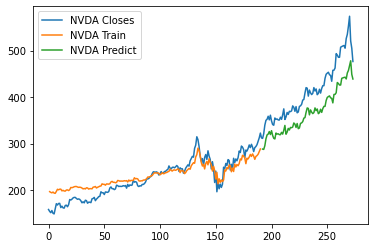

In [21]:
plt.plot(scaler.inverse_transform(scaled_data), label = ticker+' Closes')
plt.plot(train_predict_plot, label = ticker+' Train')
plt.plot(test_predict_plot, label = ticker+' Predict')
plt.legend()
plt.show()

In [22]:
print(len(data['Close']))
print(len(train_predictions))
print(len(test_predictions))

274
190
82


In [23]:
data['AITrain'] = train_predict_plot
data['AITest'] = test_predict_plot
data.tail()

,Close,AITrain,AITest
Date,,,
2020-09-01T00:00:00.000Z,552.84,NaN,457.356140
2020-09-02T00:00:00.000Z,573.86,NaN,467.323334
2020-09-03T00:00:00.000Z,520.62,NaN,478.096130
2020-09-04T00:00:00.000Z,504.90,NaN,448.794403
2020-09-08T00:00:00.000Z,476.52,NaN,438.865997


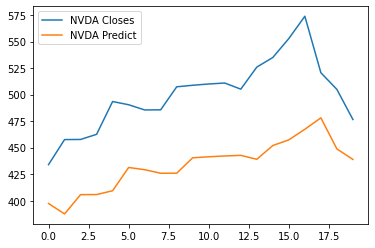

In [24]:
plt.plot(scaler.inverse_transform(scaled_data[-20:]), label=ticker+' Closes')
plt.plot(test_predict_plot[-20:], label=ticker+' Predict')
plt.legend()
plt.show()

In [ ]:
#data.to_csv(ticker+'_predict.csv')